In [ ]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
import plotly.express as px

In [ ]:
df = pd.read_csv('/content/hotel_bookings (2) (3).csv')
df.head()

,customer_ID,Hotel_Name,Is_Canceled,Lead_Time,Arrival_Date_Year,Arrival_Date_Month,Arrival_Date_Week_Number,Arrival_Date_Day_Of_Month,Stays_In_Weekend_Nights,Stays_In_Week_Nights,No_Of_Adults,No_Of_Children,No_Of_Babies,Type_Of_Meal,Country,Market_Segment,Distribution_Channel,Is_Repeated_Guest,Previous_Cancellations,Previous_Bookings_Not_Cancelled,Reserved_Room_Type,Assigned_Room_Type,Booking_Changes,Deposit_Type,Booking_Agent,Days_In_Waiting_List,Customer_Type,Average_Daily_Rate,Total_Of_Special_Requests,Reservation_Status,Reservation_Status_Date
0,1,Resort Hotel,0,0,0,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,3,No Deposit,NaN,0,Transient,0.0,0,Check-Out,07-01-2015
1,2,Resort Hotel,0,737,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,4,No Deposit,NaN,0,Transient,0.0,0,Check-Out,07-01-2015
2,3,Resort Hotel,0,7,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Direct,Direct,0,0,0,A,C,0,No Deposit,NaN,0,Transient,75.0,0,Check-Out,07-02-2015
3,4,Resort Hotel,0,13,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Corporate,Corporate,0,0,0,A,A,0,No Deposit,304.0,0,Transient,75.0,0,Check-Out,07-02-2015
4,5,Resort Hotel,0,14,2015,July,27,1,0,2,2,0.0,0,BB,GBR,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,240.0,0,Transient,98.0,1,Check-Out,07-03-2015


In [ ]:
df.shape

(119390, 31)

EDA

In [ ]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
customer_ID,119390.0,59695.500000,34465.068657,1.00,29848.25,59695.500,89542.75,119390.0
Is_Canceled,119390.0,0.370416,0.482918,0.00,0.00,0.000,1.00,1.0
Lead_Time,119390.0,104.008552,106.861301,0.00,18.00,69.000,160.00,737.0
Arrival_Date_Year,119390.0,2016.139677,5.877724,0.00,2016.00,2016.000,2017.00,2017.0
Arrival_Date_Week_Number,119390.0,27.165173,13.605138,1.00,16.00,28.000,38.00,53.0
Arrival_Date_Day_Of_Month,119390.0,15.798241,8.780829,1.00,8.00,16.000,23.00,31.0
Stays_In_Weekend_Nights,119390.0,0.927599,0.998613,0.00,0.00,1.000,2.00,19.0
Stays_In_Week_Nights,119390.0,2.500302,1.908286,0.00,1.00,2.000,3.00,50.0
No_Of_Adults,119390.0,1.856403,0.579261,0.00,2.00,2.000,2.00,55.0
No_Of_Children,119386.0,0.103890,0.398561,0.00,0.00,0.000,0.00,10.0


In [ ]:
df.isnull().sum()

customer_ID                            0
Hotel_Name                             0
Is_Canceled                            0
Lead_Time                              0
Arrival_Date_Year                      0
Arrival_Date_Month                     0
Arrival_Date_Week_Number               0
Arrival_Date_Day_Of_Month              0
Stays_In_Weekend_Nights                0
Stays_In_Week_Nights                   0
No_Of_Adults                           0
No_Of_Children                         4
No_Of_Babies                           0
Type_Of_Meal                           0
Country                              488
Market_Segment                         0
Distribution_Channel                   0
Is_Repeated_Guest                      0
Previous_Cancellations                 0
Previous_Bookings_Not_Cancelled        0
Reserved_Room_Type                     0
Assigned_Room_Type                     0
Booking_Changes                        0
Deposit_Type                           0
Booking_Agent   

In the above column agent has many missing values. It means that the reservation was mostly made by a person

In [ ]:
df.var()

customer_ID                        1.187841e+09
Is_Canceled                        2.332100e-01
Lead_Time                          1.141934e+04
Arrival_Date_Year                  3.454764e+01
Arrival_Date_Week_Number           1.850998e+02
Arrival_Date_Day_Of_Month          7.710297e+01
Stays_In_Weekend_Nights            9.972289e-01
Stays_In_Week_Nights               3.641554e+00
No_Of_Adults                       3.355433e-01
No_Of_Children                     1.588512e-01
No_Of_Babies                       9.493811e-03
Is_Repeated_Guest                  3.089409e-02
Previous_Cancellations             7.129039e-01
Previous_Bookings_Not_Cancelled    2.242317e+00
Booking_Changes                    4.255026e-01
Booking_Agent                      1.227100e+04
Days_In_Waiting_List               3.095742e+02
Average_Daily_Rate                 2.553866e+03
Total_Of_Special_Requests          6.285293e-01
dtype: float64

Handling missing values

In [ ]:
df['Country'].fillna('PRT',inplace=True)
df.fillna(0,inplace=True)
df.isnull().values.any()


False

In [ ]:
df.Hotel_Name.unique()

array(['Resort Hotel', 'City Hotel'], dtype=object)

In [ ]:
resort = df[(df['Hotel_Name']=='Resort Hotel') & (df['Is_Canceled']==0)]
city   = df[(df['Hotel_Name']=='City Hotel')   &  (df['Is_Canceled']==0)]

In [ ]:
resort.head()

,customer_ID,Hotel_Name,Is_Canceled,Lead_Time,Arrival_Date_Year,Arrival_Date_Month,Arrival_Date_Week_Number,Arrival_Date_Day_Of_Month,Stays_In_Weekend_Nights,Stays_In_Week_Nights,No_Of_Adults,No_Of_Children,No_Of_Babies,Type_Of_Meal,Country,Market_Segment,Distribution_Channel,Is_Repeated_Guest,Previous_Cancellations,Previous_Bookings_Not_Cancelled,Reserved_Room_Type,Assigned_Room_Type,Booking_Changes,Deposit_Type,Booking_Agent,Days_In_Waiting_List,Customer_Type,Average_Daily_Rate,Total_Of_Special_Requests,Reservation_Status,Reservation_Status_Date
0,1,Resort Hotel,0,0,0,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,3,No Deposit,0.0,0,Transient,0.0,0,Check-Out,07-01-2015
1,2,Resort Hotel,0,737,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,4,No Deposit,0.0,0,Transient,0.0,0,Check-Out,07-01-2015
2,3,Resort Hotel,0,7,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Direct,Direct,0,0,0,A,C,0,No Deposit,0.0,0,Transient,75.0,0,Check-Out,07-02-2015
3,4,Resort Hotel,0,13,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Corporate,Corporate,0,0,0,A,A,0,No Deposit,304.0,0,Transient,75.0,0,Check-Out,07-02-2015
4,5,Resort Hotel,0,14,2015,July,27,1,0,2,2,0.0,0,BB,GBR,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,240.0,0,Transient,98.0,1,Check-Out,07-03-2015


In [ ]:
resort.shape

(28938, 31)

In [ ]:
city.head()

,customer_ID,Hotel_Name,Is_Canceled,Lead_Time,Arrival_Date_Year,Arrival_Date_Month,Arrival_Date_Week_Number,Arrival_Date_Day_Of_Month,Stays_In_Weekend_Nights,Stays_In_Week_Nights,No_Of_Adults,No_Of_Children,No_Of_Babies,Type_Of_Meal,Country,Market_Segment,Distribution_Channel,Is_Repeated_Guest,Previous_Cancellations,Previous_Bookings_Not_Cancelled,Reserved_Room_Type,Assigned_Room_Type,Booking_Changes,Deposit_Type,Booking_Agent,Days_In_Waiting_List,Customer_Type,Average_Daily_Rate,Total_Of_Special_Requests,Reservation_Status,Reservation_Status_Date
40060,40061,City Hotel,0,6,2015,July,27,1,0,2,1,0.0,0,HB,PRT,Offline TA/TO,TA/TO,0,0,0,A,A,0,No Deposit,6.0,0,Transient,0.00,0,Check-Out,07-03-2015
40066,40067,City Hotel,0,3,2015,July,27,2,0,3,1,0.0,0,HB,PRT,Groups,TA/TO,0,0,0,A,A,1,No Deposit,1.0,0,Transient-Party,58.67,0,Check-Out,07-05-2015
40070,40071,City Hotel,0,43,2015,July,27,3,0,2,2,0.0,0,HB,PRT,Groups,TA/TO,0,0,0,A,A,0,No Deposit,1.0,0,Transient-Party,86.00,0,Check-Out,07-05-2015
40071,40072,City Hotel,0,43,2015,July,27,3,0,2,2,0.0,0,HB,PRT,Groups,TA/TO,0,0,0,A,A,1,No Deposit,1.0,0,Transient-Party,43.00,0,Check-Out,07-05-2015
40072,40073,City Hotel,0,43,2015,July,27,3,0,2,2,0.0,0,HB,PRT,Groups,TA/TO,0,0,0,A,A,0,No Deposit,1.0,0,Transient-Party,86.00,0,Check-Out,07-05-2015


In [ ]:
city.shape

(46228, 31)

In [ ]:
import plotly.graph_objs as go
from plotly.offline import iplot

label = resort['Country'].value_counts().index
value = resort['Country'].value_counts()

iplot([go.Pie(labels=label,values=value,hoverinfo='label+percent',textinfo='value')])


In [ ]:
data_country = df[df['Is_Canceled']==0]['Country'].value_counts().reset_index()
data_country.columns = ['Country','No.of Guests']
data_country

,Country,No.of Guests
0,PRT,21492
1,GBR,9676
2,FRA,8481
3,ESP,6391
4,DEU,6069
...,...,...
160,BDI,1
161,SLE,1
162,KIR,1
163,BHR,1


In [ ]:
px.choropleth(data_country,locations=data_country['Country'],color=data_country['No.of Guests'],hover_name=data_country['Country'],title='Home Country of Guests')


How much do guests pay for a room per night?

Distribution of price of each room type

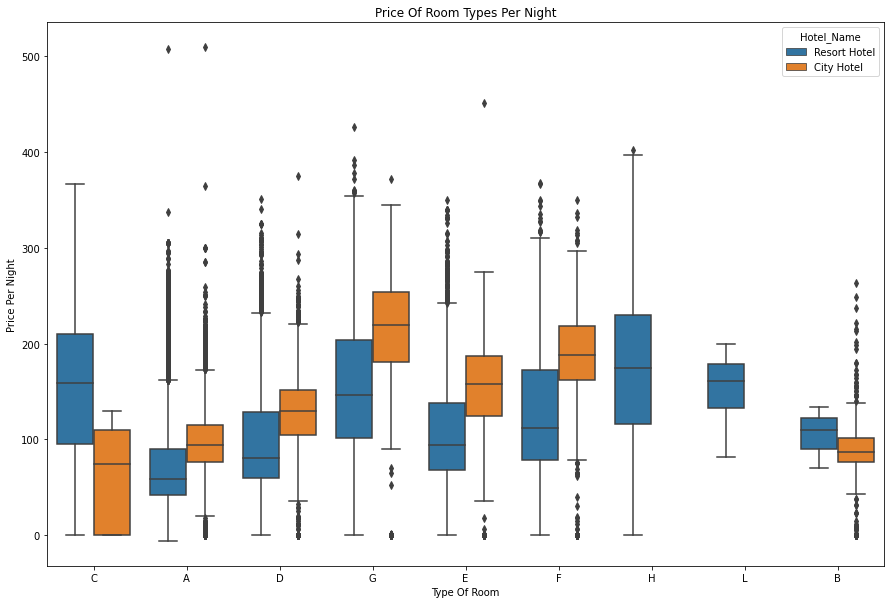

In [ ]:
plt.figure(figsize=(15,10))
sns.boxplot(data=df[df['Is_Canceled'] == 0],x='Reserved_Room_Type',y='Average_Daily_Rate',hue='Hotel_Name')
plt.title('Price Of Room Types Per Night')
plt.xlabel('Type Of Room')
plt.ylabel('Price Per Night')
plt.show()

How does the price of room per night vary over the year?

In [ ]:
def data(df):
    data = df[df['Is_Canceled']==0].groupby('Arrival_Date_Month')['Average_Daily_Rate'].mean().reset_index()
    return data


In [ ]:
data2 = data(resort)

In [ ]:
data2 = data2.merge(data(city),on='Arrival_Date_Month')
data2.head()

,Arrival_Date_Month,Average_Daily_Rate_x,Average_Daily_Rate_y
0,April,75.867816,111.856824
1,August,181.205892,118.412083
2,December,68.322236,87.856764
3,February,54.147478,86.183025
4,January,48.708919,82.160634


In [ ]:
! pip install sorted-months-weekdays
! pip install sort-dataframeby-monthorweek


  Created wheel for sorted-months-weekdays: filename=sorted_months_weekdays-0.2-py3-none-any.whl size=3247 sha256=c46ea7629a344662e7fee59fec1091baa3ddf232577e5dd9a07e4771d59a18e2
  Stored in directory: /root/.cache/pip/wheels/4f/4f/78/3f1b8fc72651f7c766a6f73d667fccb12a8aabe240b38df7a4
Successfully built sorted-months-weekdays
  Created wheel for sort-dataframeby-monthorweek: filename=sort_dataframeby_monthorweek-0.4-py3-none-any.whl size=3441 sha256=6cc59ef5aa8dfb948f8ff4e2b3addf6c4f1dcff9b6ab8065bda8cfed109341bb
  Stored in directory: /root/.cache/pip/wheels/de/e1/ad/5fe265a9780676079c4b8caaaffaa8d5c4ab2f37cf823e8aa8
Successfully built sort-dataframeby-monthorweek


Distribution of nights spent at hotels by market segment and hotel type

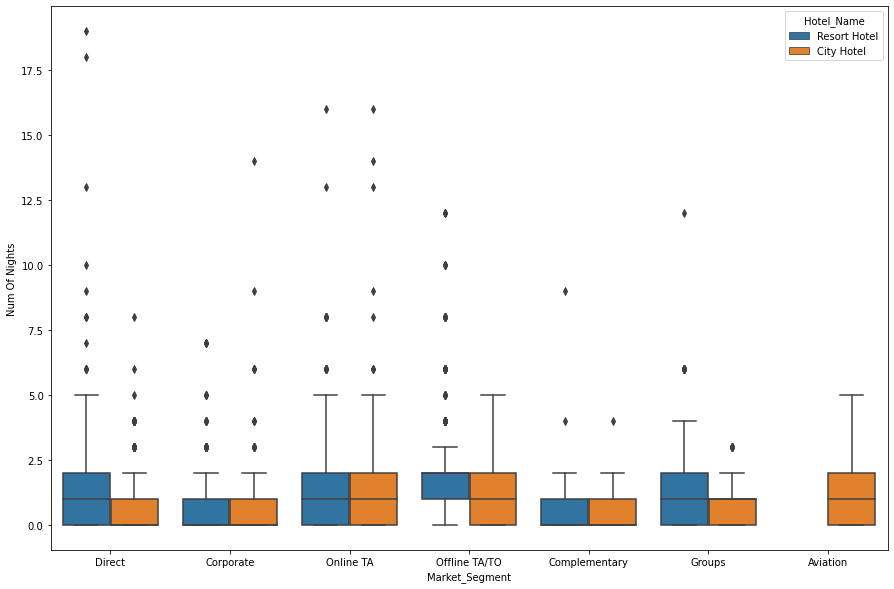

In [ ]:
plt.figure(figsize=(15,10))
sns.boxplot(data=df[df['Is_Canceled'] == 0],x='Market_Segment',y='Stays_In_Weekend_Nights',hue='Hotel_Name')
plt.ylabel('Num Of Nights')
plt.show()

Most people don't seem to prefer to stay at the hotel more than one week


Analysing preference of guests

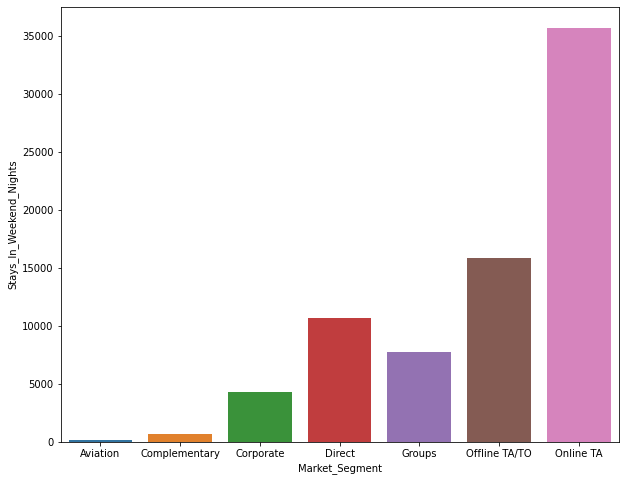

In [ ]:
plt.figure(figsize=(10,8))
sns.barplot(x=df[df['Is_Canceled']==0].groupby('Market_Segment')['Stays_In_Weekend_Nights'].count().index,
            y=df[df['Is_Canceled']==0].groupby('Market_Segment')['Stays_In_Weekend_Nights'].count())


The online travel agents are the best market for reservation by people

In [ ]:
df['Type_Of_Meal'].unique()

array(['BB', 'FB', 'HB', 'SC', 'Undefined'], dtype=object)

In [ ]:
px.pie(data_frame=df[df['Is_Canceled']==0],names=df['Type_Of_Meal'].value_counts().index,values=df['Type_Of_Meal'].value_counts())

The guests are prefered to booked meal BB Bed & Breakfast

Analysing relationship between special requests and cancellation


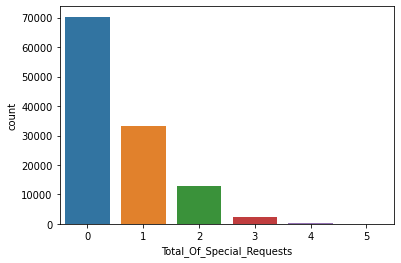

In [ ]:
sns.countplot(x=df.Total_Of_Special_Requests)  

In [ ]:
100 * len(df[df['Total_Of_Special_Requests'] == 0]) / len(df)

58.89773012815144

It seems this is almost 60 percent of the bookers don't have any special requests


In [ ]:
df.groupby(['Total_Of_Special_Requests','Is_Canceled']).agg({'Total_Of_Special_Requests':'count'}).unstack()


Total_Of_Special_Requests       
Is_Canceled                                       0      1
Total_Of_Special_Requests                                 
0                                             36762  33556
1                                             25908   7318
2                                             10103   2866
3                                              2051    446
4                                               304     36
5                                                38      2

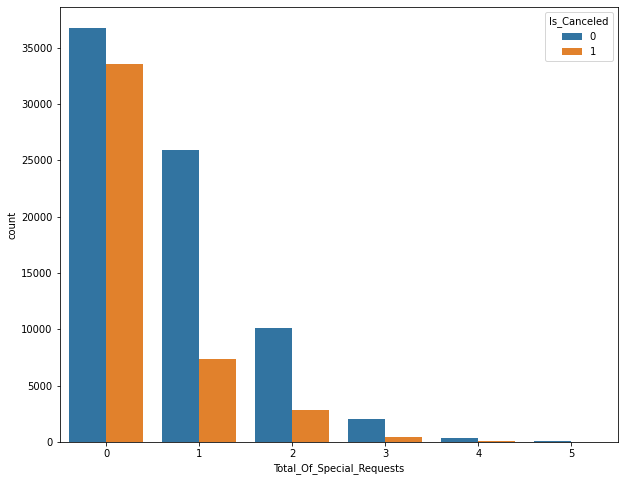

In [ ]:
plt.figure(figsize=(10,8))
sns.countplot(data=df,x='Total_Of_Special_Requests',hue='Is_Canceled')

Which months guests are high?

In [ ]:
df.Arrival_Date_Year.unique()

array([   0, 2015, 2016, 2017])

In [ ]:
df.Arrival_Date_Month.value_counts()

August       13877
July         12661
May          11791
October      11160
April        11089
June         10939
September    10508
March         9794
February      8068
November      6794
December      6780
January       5929
Name: Arrival_Date_Month, dtype: int64

In [ ]:
df.groupby(['Arrival_Date_Year','Arrival_Date_Month']).agg({'Is_Canceled':'count'}).unstack()

Is_Canceled                   ...                           
Arrival_Date_Month       April  August December  ... November October September
Arrival_Date_Year                                ...                           
0                          NaN     NaN      NaN  ...      NaN     NaN       NaN
2015                       NaN  3889.0   2920.0  ...   2340.0  4957.0    5114.0
2016                    5428.0  5063.0   3860.0  ...   4454.0  6203.0    5394.0
2017                    5661.0  4925.0      NaN  ...      NaN     NaN       NaN

[4 rows x 12 columns]

Text(0, 0.5, 'Num of Guests')

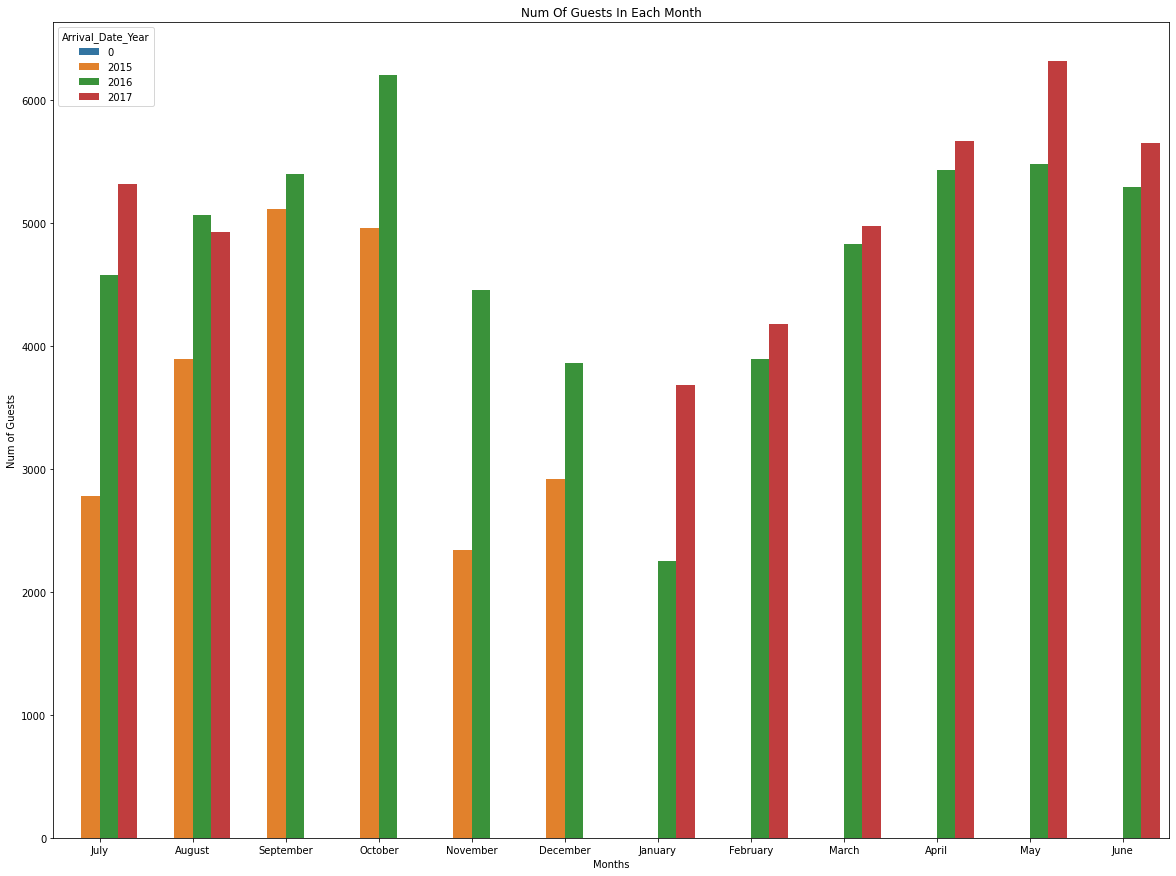

In [ ]:
plt.figure(figsize=(20,15))
sns.countplot(data=df,x='Arrival_Date_Month',hue='Arrival_Date_Year')
plt.title('Num Of Guests In Each Month')
plt.xlabel('Months')
plt.ylabel('Num of Guests')

In 2015 the most number of guests come at September.              
In 2016 the most number of guests come at October.            
In 2017 the most number of guests come at May.



In [ ]:
100 * df.corr()['Is_Canceled'].sort_values()

customer_ID                        -24.223773
Total_Of_Special_Requests          -23.465777
Booking_Changes                    -14.438099
Is_Repeated_Guest                   -8.479342
Previous_Bookings_Not_Cancelled     -5.735772
Booking_Agent                       -4.652945
No_Of_Babies                        -3.249109
Arrival_Date_Day_Of_Month           -0.613008
Stays_In_Weekend_Nights             -0.179108
Arrival_Date_Year                    0.420778
No_Of_Children                       0.503625
Arrival_Date_Week_Number             0.814807
Stays_In_Week_Nights                 2.476463
Average_Daily_Rate                   4.755660
Days_In_Waiting_List                 5.418582
No_Of_Adults                         6.001721
Previous_Cancellations              11.013281
Lead_Time                           29.314884
Is_Canceled                        100.000000
Name: Is_Canceled, dtype: float64

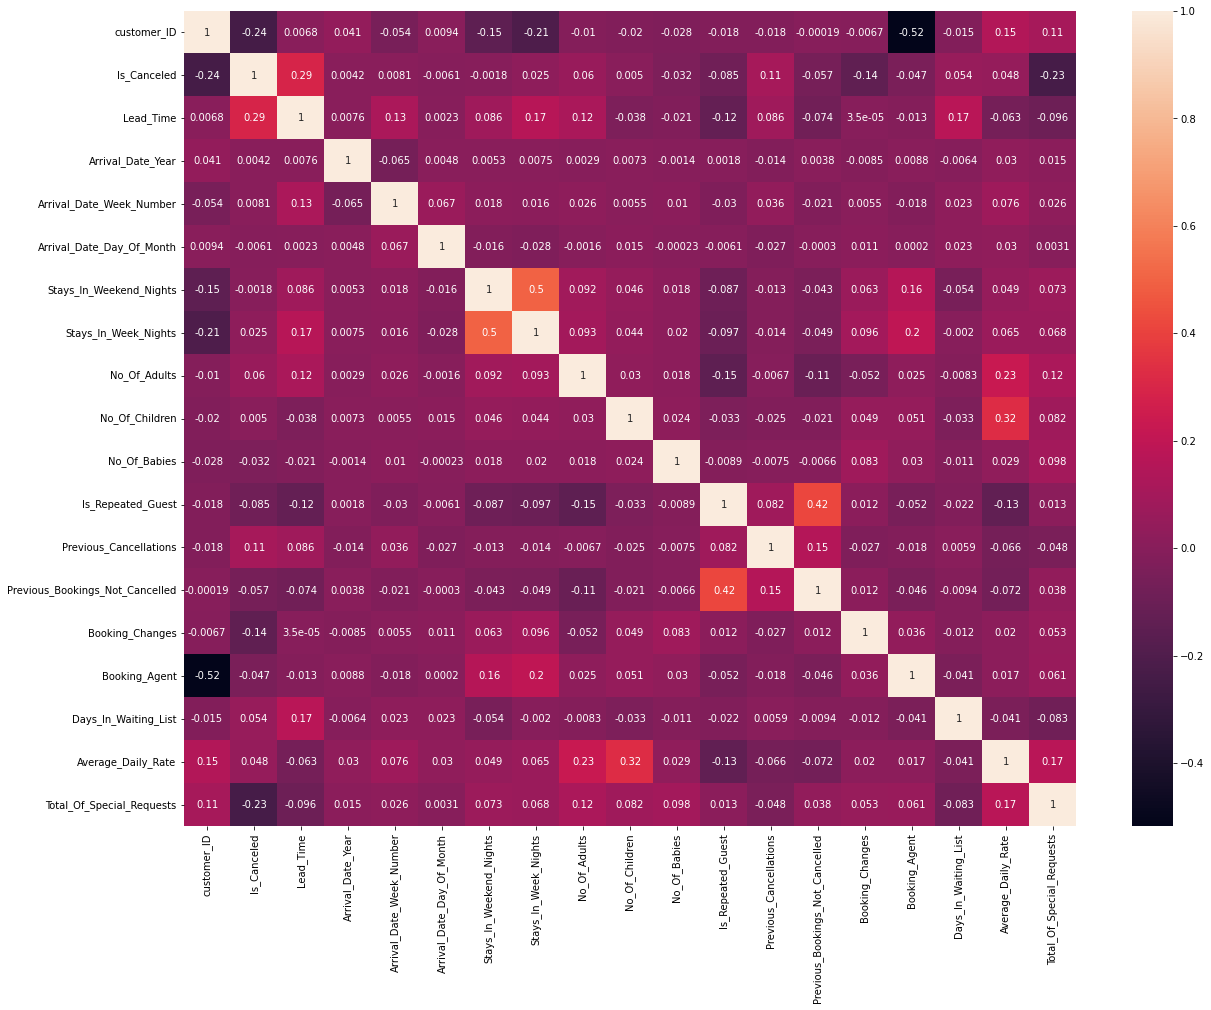

In [ ]:
plt.figure(figsize=(20,15))
sns.heatmap(df.corr(),annot=True)

modelling

In [ ]:
df.var()

customer_ID                        1.187841e+09
Is_Canceled                        2.332100e-01
Lead_Time                          1.141934e+04
Arrival_Date_Year                  3.454764e+01
Arrival_Date_Week_Number           1.850998e+02
Arrival_Date_Day_Of_Month          7.710297e+01
Stays_In_Weekend_Nights            9.972289e-01
Stays_In_Week_Nights               3.641554e+00
No_Of_Adults                       3.355433e-01
No_Of_Children                     1.588463e-01
No_Of_Babies                       9.493811e-03
Is_Repeated_Guest                  3.089409e-02
Previous_Cancellations             7.129039e-01
Previous_Bookings_Not_Cancelled    2.242317e+00
Booking_Changes                    4.255026e-01
Booking_Agent                      1.147940e+04
Days_In_Waiting_List               3.095742e+02
Average_Daily_Rate                 2.553866e+03
Total_Of_Special_Requests          6.285293e-01
dtype: float64

In [ ]:
df['Lead_Time']=np.log(df['Lead_Time']+1)
df['B'] = np.log(df['Booking_Agent'] + 1)
df['Average_Daily_Rate'] = np.log(df['Average_Daily_Rate'] + 1)
df['Days_In_Waiting_List'] = np.log(df['Days_In_Waiting_List'] + 1)
df['Arrival_Date_Week_Number'] = np.log(df['Arrival_Date_Week_Number'] + 1)
df['Arrival_Date_Day_Of_Month'] = np.log(df['Arrival_Date_Day_Of_Month'] + 1)
df['Arrival_Date_Year'] = np.log(df['Arrival_Date_Year'] + 1)

df = df.drop([])


In [ ]:
df.columns

Index(['customer_ID', 'Hotel_Name', 'Is_Canceled', 'Lead_Time',
       'Arrival_Date_Year', 'Arrival_Date_Month', 'Arrival_Date_Week_Number',
       'Arrival_Date_Day_Of_Month', 'Stays_In_Weekend_Nights',
       'Stays_In_Week_Nights', 'No_Of_Adults', 'No_Of_Children',
       'No_Of_Babies', 'Type_Of_Meal', 'Country', 'Market_Segment',
       'Distribution_Channel', 'Is_Repeated_Guest', 'Previous_Cancellations',
       'Previous_Bookings_Not_Cancelled', 'Reserved_Room_Type',
       'Assigned_Room_Type', 'Booking_Changes', 'Deposit_Type',
       'Booking_Agent', 'Days_In_Waiting_List', 'Customer_Type',
       'Average_Daily_Rate', 'Total_Of_Special_Requests', 'Reservation_Status',
       'Reservation_Status_Date', 'B'],
      dtype='object')

In [ ]:
df = df.drop_duplicates()
len(df)

119390

In [ ]:
label = ['Booking_Agent','Total_Of_Special_Requests','Booking_Changes',
         'Is_Repeated_Guest','Reservation_Status_Date','Stays_In_Weekend_Nights','Stays_In_Week_Nights',
         'Reserved_Room_Type','Assigned_Room_Type','No_Of_Adults','No_Of_Children','No_Of_Babies']
df.drop(labels=label,axis=1,inplace=True)
df.head()

,customer_ID,Hotel_Name,Is_Canceled,Lead_Time,Arrival_Date_Year,Arrival_Date_Month,Arrival_Date_Week_Number,Arrival_Date_Day_Of_Month,Type_Of_Meal,Country,Market_Segment,Distribution_Channel,Previous_Cancellations,Previous_Bookings_Not_Cancelled,Deposit_Type,Days_In_Waiting_List,Customer_Type,Average_Daily_Rate,Reservation_Status
0,1,Resort Hotel,0,0,0,July,27,1,BB,PRT,Direct,Direct,0,0,No Deposit,0,Transient,0.0,Check-Out
1,2,Resort Hotel,0,737,2015,July,27,1,BB,PRT,Direct,Direct,0,0,No Deposit,0,Transient,0.0,Check-Out
2,3,Resort Hotel,0,7,2015,July,27,1,BB,GBR,Direct,Direct,0,0,No Deposit,0,Transient,75.0,Check-Out
3,4,Resort Hotel,0,13,2015,July,27,1,BB,GBR,Corporate,Corporate,0,0,No Deposit,0,Transient,75.0,Check-Out
4,5,Resort Hotel,0,14,2015,July,27,1,BB,GBR,Online TA,TA/TO,0,0,No Deposit,0,Transient,98.0,Check-Out


In [ ]:
X = df.drop(['Is_Canceled'],axis=1)
y = df['Is_Canceled']


In [ ]:
X = pd.get_dummies(X,drop_first=True)

In [ ]:
from sklearn.model_selection import train_test_split
X_train , X_test , y_train , y_test = train_test_split(X,y,test_size=0.25,random_state=42)

Selection Model

In [ ]:
# LogisticRegression
from sklearn.linear_model import LogisticRegression
log = LogisticRegression(penalty='l2',solver='liblinear',C=0.1)
log.fit(X_train,y_train)
#Print the model accuracy of training data
print('Logistic Regression Training Accuracy : ',log.score(X_train, y_train))

Logistic Regression Training Accuracy :  0.6801054253869693


In [ ]:
from sklearn.metrics import confusion_matrix , accuracy_score
cm = confusion_matrix(y_test,log.predict(X_test))
print(cm)
print('Accuracy ',accuracy_score(y_test,log.predict(X_test)))


[[15719  3001]
 [ 6563  4565]]
Accuracy  0.6795765210399357


In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test,log.predict(X_test)))
    

              precision    recall  f1-score   support

           0       0.71      0.84      0.77     18720
           1       0.60      0.41      0.49     11128

    accuracy                           0.68     29848
   macro avg       0.65      0.62      0.63     29848
weighted avg       0.67      0.68      0.66     29848

